# Notebook de prerocesamiento y modelo de regresión

En este notebook se realizará todo prerocesamiento de data para el modelo de regresión
Así mismo se generará el análisis del modelo de regresión

## Preprocesamiento de los datos

### Preprocesamiento de variables numéricas
- LotArea
- LotFrontage
- MasVnrArea
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade


In [2]:
# ! pip install pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df  = pd.read_csv("train.csv")
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                   'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                   'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                   'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']
numeric_df = df[numeric_columns]
print(numeric_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

Al analizar con info, se concluye que no requieren preprocesado , pues no tienen valores nulos.

## Análisis de correlación de las variables con el precio

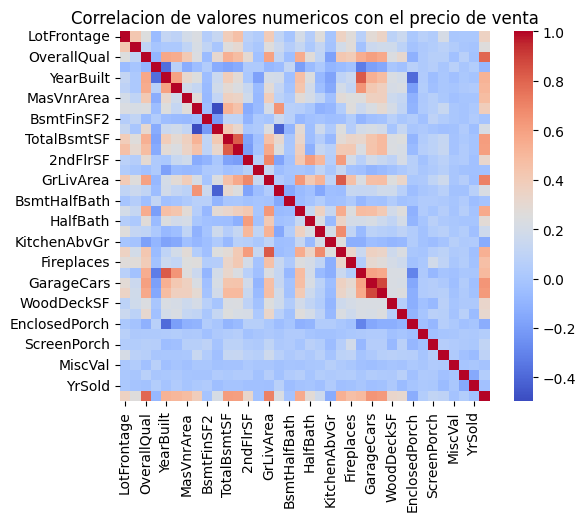

In [4]:
corr_matrix = numeric_df.corr()
# crear heatmap de correlaciones
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Correlacion de valores numericos con el precio de venta")
plt.show()

In [5]:
# valores numericos puros
saleprice_correlation = corr_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


## Resultados de correlacion:
Podemos descartar diversas variables, consideramos que una correlacion mayor a 0.5 es suficientemente significativa, por lo cual se ignoraran todas aquellas que sean menores

In [11]:
# Filtrar las variables numéricas con correlación menor a 0.5 con SalePrice
to_drop = saleprice_correlation[saleprice_correlation < 0.5].index.tolist()
cleaned_df = numeric_df.drop(columns=to_drop)
print(cleaned_df.columns)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


# Modelo linal:
## SKLEARN

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [20]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(cleaned_df.drop(columns=['SalePrice']), cleaned_df['SalePrice'], test_size=0.2, random_state=42)

# Dividir los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
print(y_pred_val.shape)
print(X_val.shape)
y_pred_test = model.predict(X_test)
mse_val = mean_squared_error(y_val, y_pred_val)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Error cuadrático medio en el conjunto de validación:", mse_val)
print("Error cuadrático medio en el conjunto de prueba:", mse_test)


(292,)
(292, 10)
Error cuadrático medio en el conjunto de validación: 1277715114.463365
Error cuadrático medio en el conjunto de prueba: 1619652271.0811412


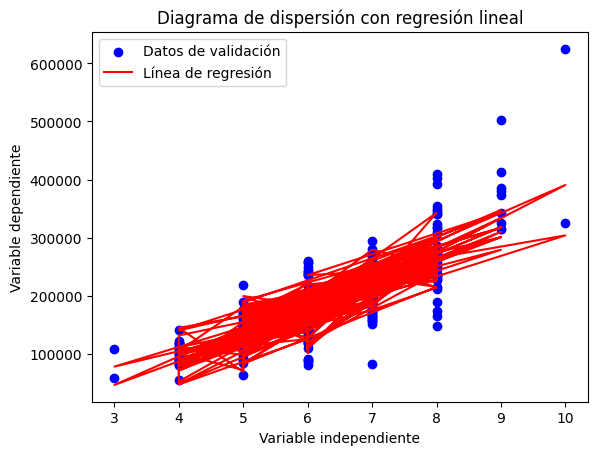

In [27]:
# Crear el gráfico de dispersión
plt.scatter(X_val.iloc[:, 0], y_val, color='blue', label='Datos de validación')

# Crear la línea de regresión lineal
plt.plot(X_val.iloc[:, 0], y_pred_val, color='red', label='Línea de regresión')

# Etiquetas y título
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.title('Diagrama de dispersión con regresión lineal')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()